In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'graphviz'

In [2]:
# 다주선형 회귀분석 

df_raw = pd.read_csv("D:/data/2/체질검사.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [7]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)


In [8]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                        test_size = 0.3, random_state =1234)

print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))

train data X size:(176, 13)
train data Y size:(176,)
test data X size:(76, 13)
test data Y size:(76,)


In [9]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set: {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print('Score on test set: {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.956
Score on test set: 0.612


In [10]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [] 
# n_estimatos: 트리 수 변경: 1~100 
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)] 
for v_n_estimators in para_n_tree: 
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234) 
    rf.fit(df_train_x, df_train_y) 
    train_score.append(rf.score(df_train_x, df_train_y)) 
    test_score.append(rf.score(df_test_x, df_test_y)) 
# 결과 저장 
df_score_n = pd.DataFrame() 
df_score_n["n_estimators"] = para_n_tree 
df_score_n["TrainScore"] = train_score 
df_score_n["TestScore"] = test_score

In [11]:
# 모델 설명력 확인
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.936,0.542
1,20,0.946,0.597
2,30,0.952,0.610
3,40,0.955,0.609
4,50,0.955,0.611
5,60,0.956,0.616
6,70,0.955,0.614
7,80,0.955,0.611
8,90,0.956,0.610
9,100,0.956,0.612


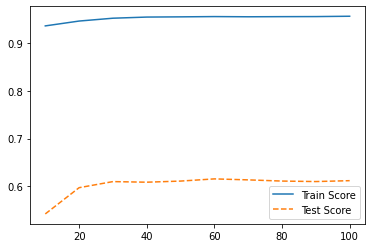

In [12]:
#모델 설명력 확인
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.legend()

In [13]:
train_score = []; test_score = [] 
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)] 
for v_min_samples_leaf in para_leaf: 
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100, 
            min_samples_leaf = v_min_samples_leaf) 
    rf.fit(df_train_x, df_train_y) 
    train_score.append(rf.score(df_train_x, df_train_y)) 
    test_score.append(rf.score(df_test_x, df_test_y))
# 데이터 테이블로 저장 
df_score_leaf = pd.DataFrame() 
df_score_leaf["MlinSamplesLeaf"] = para_leaf 
df_score_leaf["TrainScore"] = train_score 
df_score_leaf["TestScore"] = test_score

In [14]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MlinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.612
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


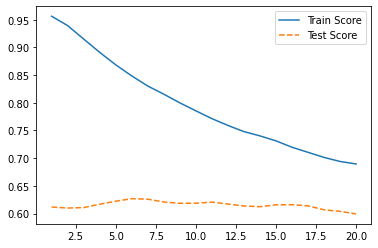

In [15]:
#모델 설명력 확인
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='--',label='Test Score')
plt.legend()

In [29]:
# train,test 설명력 결과 저장
train_score = []; test_score = []

para_split = [n_split *1 for n_split in range(2,21)]

for v_min_samples_split  in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf=6, min_samples_split=v_min_samples_split)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    

    
df_score = pd.DataFrame()
df_score['MinSamplesSplit'] = para_split
df_score['TrainScore'] = train_score
df_score['TestScore'] = test_score 

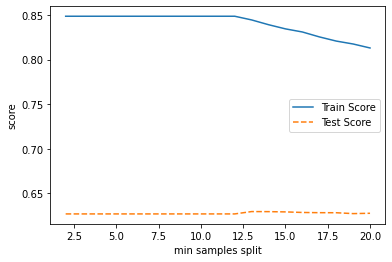

In [30]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score');
plt.xlabel('min samples split')
plt.legend()

In [31]:
# train,test 설명력 결과 저장
train_score = []; test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth  in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf=6,min_samples_split=14,
                        max_depth=v_max_depth)
    
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    

    
df_score = pd.DataFrame()
df_score['Depth'] = para_depth
df_score['TrainScore'] = train_score
df_score['TestScore'] = test_score 

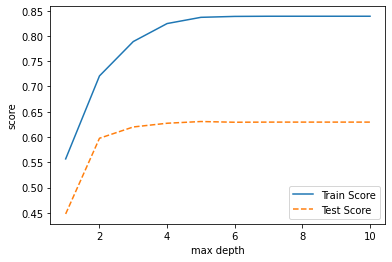

In [32]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score');
plt.xlabel('max depth')
plt.legend()

In [34]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6,
                                min_samples_split = 14, max_depth =4)
rf_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print('Score on training set: {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print('Score on test set: {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.825
Score on test set: 0.627


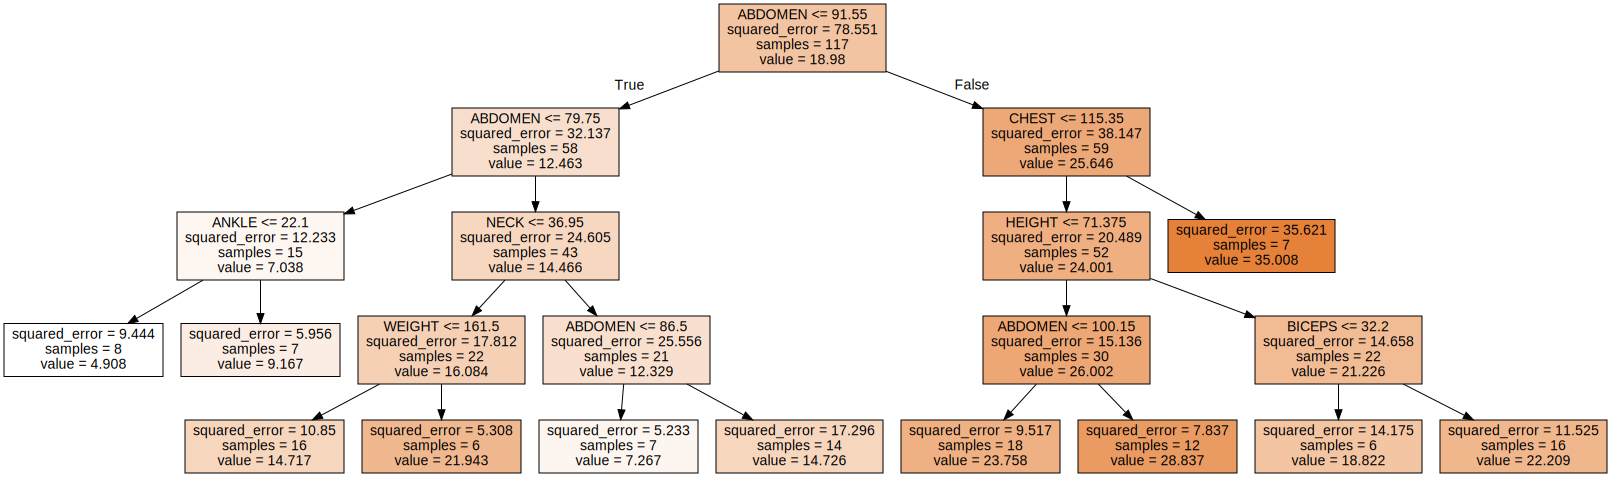

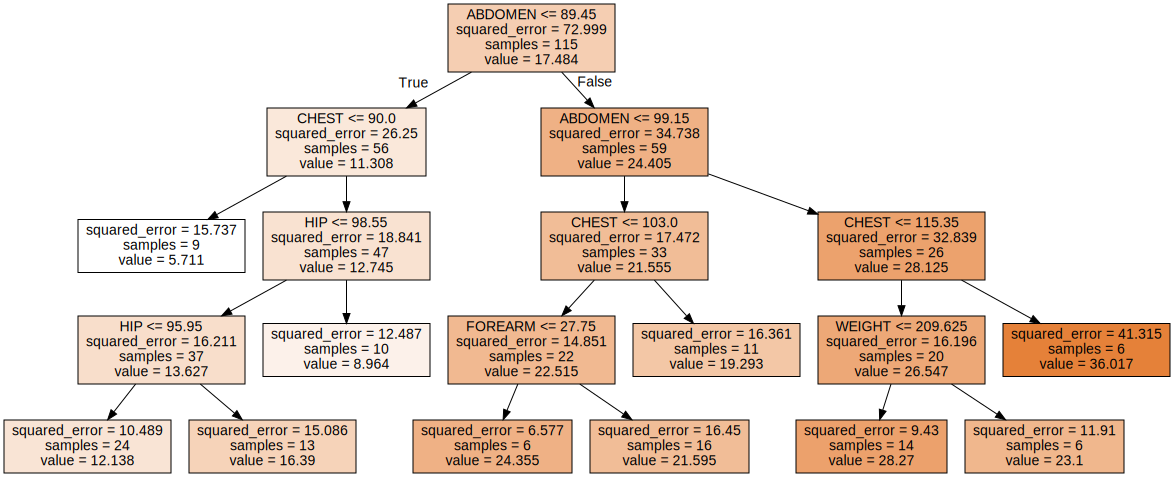

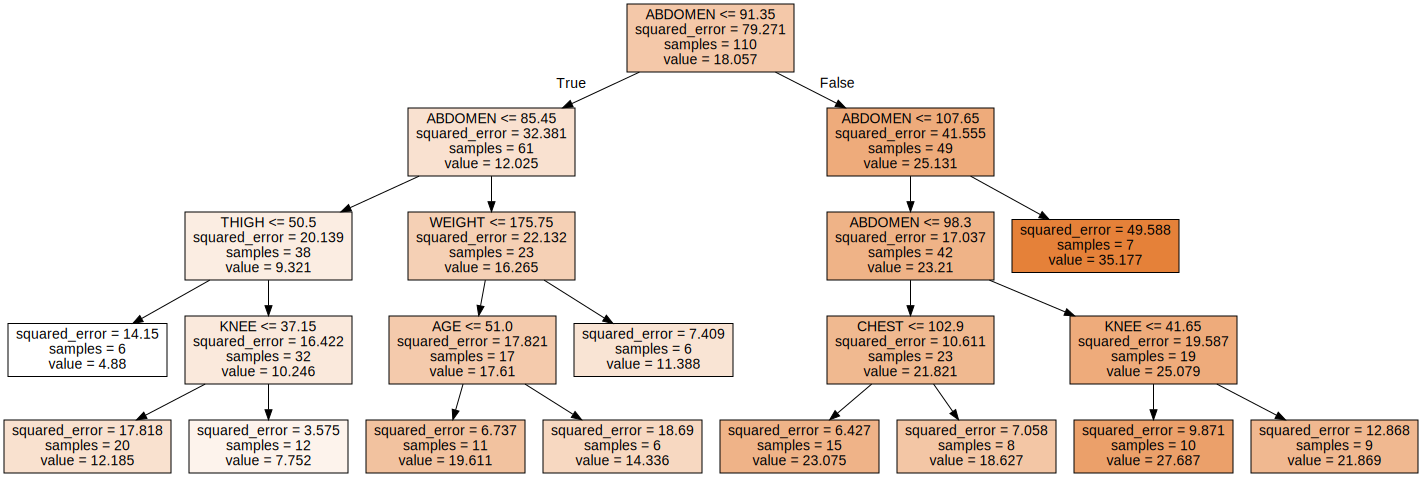

In [35]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file='rfr_final_0.dot', feature_names=v_feature_name, impurity=True, filled=True)
# tree_final_0.dot 그리기
with open('rfr_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


# 1번 트리
export_graphviz(rf_final.estimators_[1], out_file='rfr_final_1.dot', feature_names=v_feature_name, impurity=True, filled=True)
# tree_final_1.dot 그리기
with open('rfr_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 10번 트리 
export_graphviz(rf_final.estimators_[10], out_file='rfr_final_10.dot', feature_names=v_feature_name, impurity=True, filled=True)
# tree_final_10.dot 그리기
with open('rfr_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [36]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
12,WRIST,0.010
3,NECK,0.010
8,KNEE,0.009
1,WEIGHT,0.008


Text(0, 0.5, '변수')

c:\dev\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\dev\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\dev\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\dev\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\dev\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


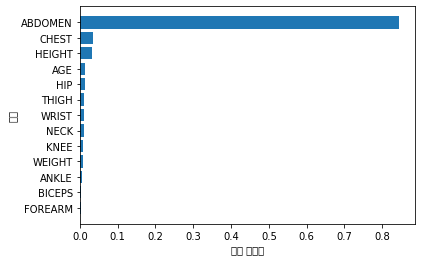

In [38]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

KeyboardInterrupt: 